In [1]:
#import pandasAI and other libs
import pandas as pd
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
import numpy as np

In [4]:
#load land use dataset(kaggle)

dataset = pd.read_csv('land_use_stats.csv')
dataset.head()

,Unnamed: 0,Rank,Country,Cultivated land (km2),Cultivated land (%),Arable land (km2),Arable land (%),Permanent crops (km2),Permanent crops (%),Other lands (km2),Other lands (%),Total area (km2),Date
0,0,,World,17235800,11.6,15827534,10.7,1549600,1.0,131.701.100,88.4,149000000.0,2011
1,1,1,India,1765260,53.7,1656780,50.4,108479,3.3,1522002,46.3,3287263.0,2020
2,2,2,United States,1681826,17.1,1652028,16.8,29798,0.3,8151691,82.9,9833517.0,2020
3,3,3,Russia,1265267,7.4,1248169,7.3,17098,0.1,15832975,92.6,17098242.0,2011
4,4,4,China,1238013,12.9,1084461,11.3,153552,1.6,8358947,87.1,9596960.0,2011


In [2]:
#initialize the llm
llm = OpenAI(api_token="Your_API_token")
query_object = PandasAI(llm)

In [10]:
#return the first row
query_object(dataset,prompt='return the first row')

Unnamed: 0                         0
Rank                                
Country                        World
Cultivated land (km2)       17235800
Cultivated land (%)             11.6
Arable land (km2)           15827534
Arable land (%)                 10.7
Permanent crops (km2)        1549600
Permanent crops (%)              1.0
Other lands (km2)        131.701.100
Other lands (%)                 88.4
Total area (km2)         149000000.0
Date                            2011
Name: 0, dtype: object

In [8]:
dataset.head()

,Unnamed: 0,Rank,Country,Cultivated land (km2),Cultivated land (%),Arable land (km2),Arable land (%),Permanent crops (km2),Permanent crops (%),Other lands (km2),Other lands (%),Total area (km2),Date
0,0,,World,17235800,11.6,15827534,10.7,1549600,1.0,131.701.100,88.4,149000000.0,2011
1,1,1,India,1765260,53.7,1656780,50.4,108479,3.3,1522002,46.3,3287263.0,2020
2,2,2,United States,1681826,17.1,1652028,16.8,29798,0.3,8151691,82.9,9833517.0,2020
3,3,3,Russia,1265267,7.4,1248169,7.3,17098,0.1,15832975,92.6,17098242.0,2011
4,4,4,China,1238013,12.9,1084461,11.3,153552,1.6,8358947,87.1,9596960.0,2011


In [11]:
#russia land percentage query
query_object(dataset,prompt='what % of cultivated land does russia have')

7.4

In [17]:
#replicating basic arithmetic queries
sum_permanent_crops = dataset.iloc[10,7] + dataset.iloc[26,7] + dataset.iloc[32,7]

In [18]:
sum_permanent_crops

22917

In [19]:
#using pandasAI
query_object(dataset,prompt='what is the sum of the permanent crops of Argentina, Germany, and Bangladesh')

22917

In [56]:
#a little harder
data_2011_ara = dataset[(dataset['Date']==2011) & (dataset['Arable land (%)']<8)]

In [61]:
data_2011_ara[data_2011_ara['Permanent crops (km2)'] == data_2011_ara['Permanent crops (km2)'].max(axis=0)].Country

5    Brazil
Name: Country, dtype: object

In [53]:
#using pandasAI
query_object(dataset,prompt='country with date 2011 where arable land % is less than 8 with the most permanent crops')

'Brazil'

In [70]:
#getting the quartiles of a column
total_area = pd.Series(dataset['Total area (km2)'])
np.percentile(total_area,q=[25, 50, 75])

array([  2235.,  71740., 438317.])

In [72]:
#using pandasAI
query_object(dataset,prompt='get the first, second and third quartile values of the column- Total Area')

0.25      2235.0
0.50     71740.0
0.75    438317.0
Name: Total area (km2), dtype: float64

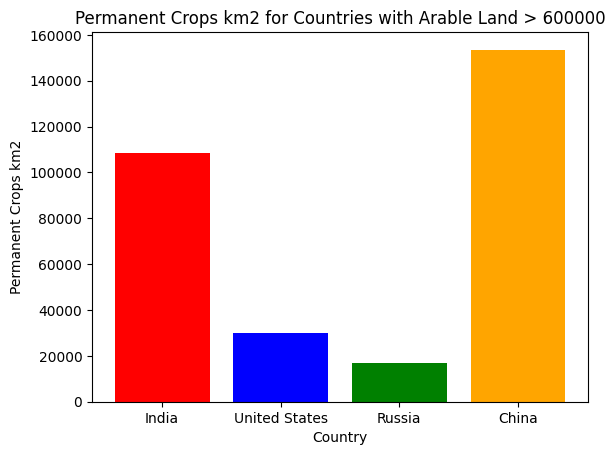

In [78]:
#histogram
query_object(dataset,prompt='plot a bar graph of countries having an arable land greater than 600000 according to the permanent crops km2 feature in different colors except world')

In [5]:
#prediction 
query_object(dataset,prompt='for a country with % permanent crops >2 predict the total arable land')

4064531

In [7]:
query_object(dataset,prompt='find arable land for a country with 2% permanent crops using linear regression')

Generated code includes import of LinearRegression which is not in whitelist.


'Unfortunately, I was not able to answer your question, because of the following error:\n\nGenerated code includes import of LinearRegression which is not in whitelist.\n'